##  Vector Autoregressions tsa.vector_arr
statsmodels.tsa.vector_ar contains methods that are useful for simultaneously modeling and analyzing multiple time series using Vector Autoregressions (VAR) and Vector Error Correction Models (VECM).

## VAR(p) processes

We are interested in modeling a T×K
multivariate time series Y, where T denotes the number of observations and K

the number of variables. One way of estimating relationships between the time series and their lagged values is the vector autoregression process:
Yt=A1Yt−1+…+ApYt−p+utut∼Normal(0,Σu)

where Ai
is a K×K

coefficient matrix.

We follow in large part the methods and notation of Lutkepohl (2005), which we will not develop here.

In [2]:
# some example data
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR

In [3]:
mdata = sm.datasets.macrodata.load_pandas().data

In [4]:
mdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
5,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55
6,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.750,140.9,2.36,5.6,181.528,2.70,-0.34
7,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.840,141.1,2.29,6.3,182.287,1.21,1.08
8,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.810,142.1,2.37,6.8,182.992,-0.40,2.77
9,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.920,142.9,2.29,7.0,183.691,1.47,0.81


In [5]:
# prepare the dataes index
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
from statsmodels.tsa.base.datetools import dates_from_str

quarterly = dates_from_str(quarterly)

In [6]:
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pandas.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()

In [8]:
# make a VAR model
model = VAR(data)

/usr/local/lib/python2.7/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


In [10]:
# import numpy as np
# import pandas
# import statsmodels.api as sm
# from statsmodels.tsa.api import VAR, DynamicVAR
# mdata = sm.datasets.macrodata.load_pandas().data
# dates = mdata[['year', 'quarter']].astype(int).astype(str)
# quarterly = dates["year"] + "Q" + dates["quarter"]
# from statsmodels.tsa.base.datetools import dates_from_str
# quarterly = dates_from_str(quarterly)
# mdata = mdata[['realgdp','realcons','realinv']]
# mdata.index = pandas.DatetimeIndex(quarterly)
# data = np.log(mdata).diff().dropna()
# model = VAR(data)

## Note
The VAR class assumes that the passed time series are stationary. Non-stationary or trending data 
can often be transformed to be stationary by first-differencing or some other method. For direct 
analysis of non-stationary time series, a standard stable VAR(p) model is not appropriate. 

In [11]:
results = model.fit(2)

In [12]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 10, Jan, 2019
Time:                     16:09:49
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

Several ways to visualize the data using matplotlib are available.

Plotting input time series:

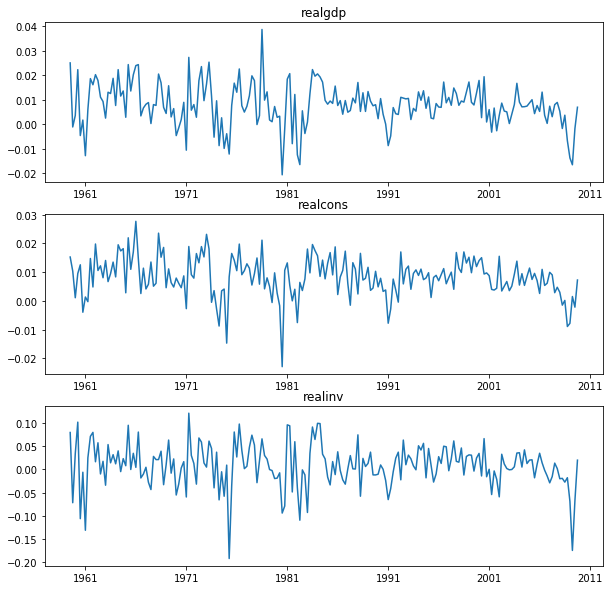

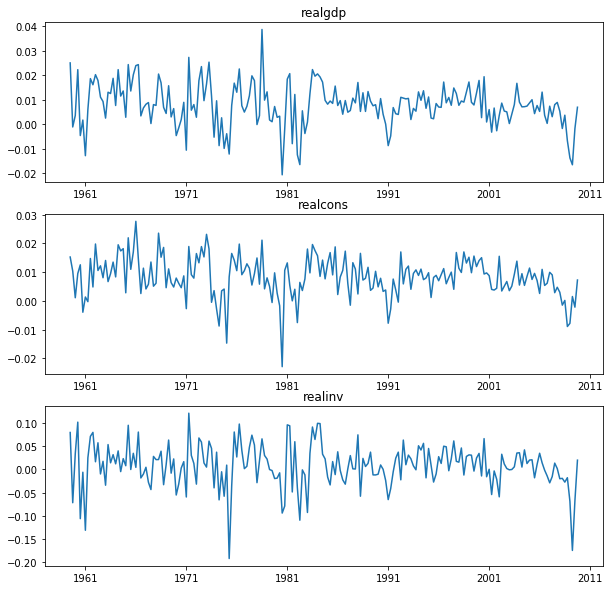

In [14]:
results.plot()

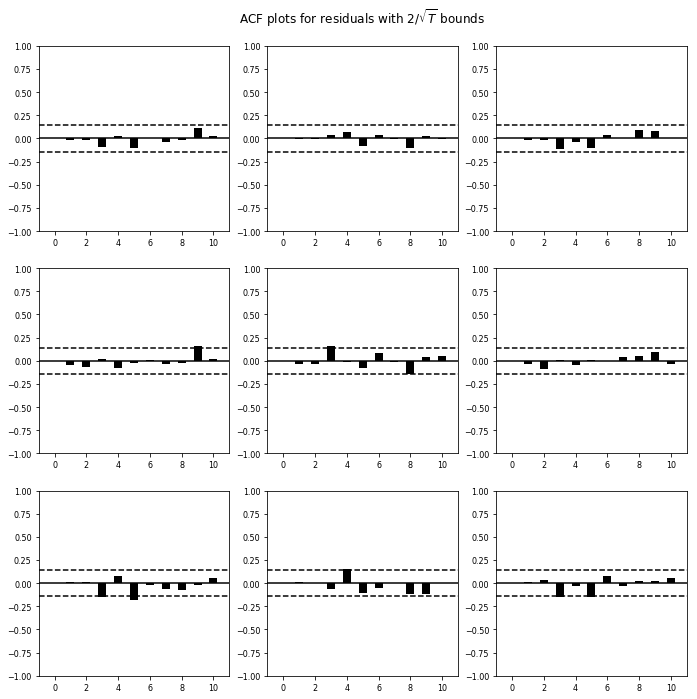

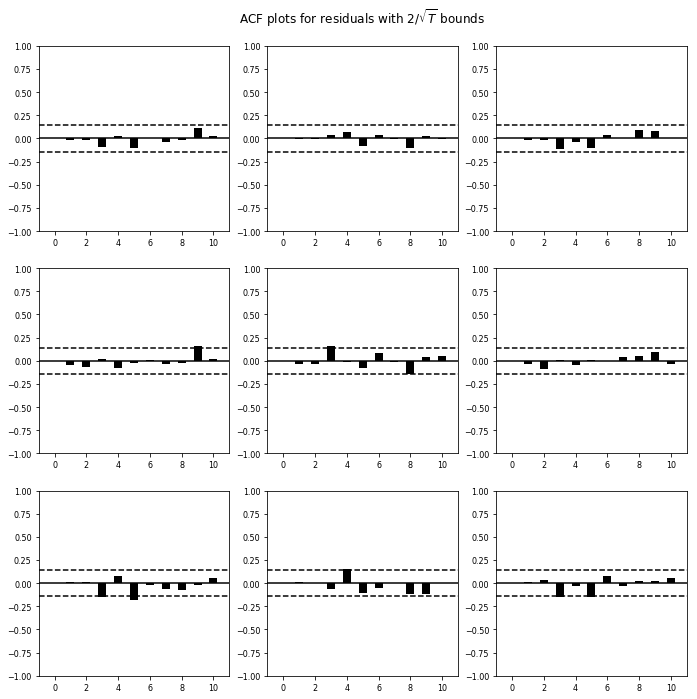

In [16]:
results.plot_acorr()

## Lag order selection

Choice of lag order can be a difficult problem. Standard analysis employs likelihood test or 
nformation criteria-based order selection. We have implemented the latter, accessible through 
the VAR class:

In [18]:
model.select_order(15)

<statsmodels.tsa.vector_ar.var_model.LagOrderResults instance at 0x7f7a0baca290>

In [19]:
results = model.fit(maxlags=15, ic='aic')

Forecasting

The linear predictor is the optimal h-step ahead forecast in terms of mean-squared error:
yt(h)=ν+A1yt(h−1)+⋯+Apyt(h−p)

We can use the forecast function to produce this forecast. Note that we have to specify the “initial value” for the forecast:

In [20]:
lag_order = results.k_ar
results.forecast(data.values[-lag_order:], 5)

array([[ 0.00616044,  0.00500006,  0.00916198],
       [ 0.00427559,  0.00344836, -0.00238478],
       [ 0.00416634,  0.0070728 , -0.01193629],
       [ 0.00557873,  0.00642784,  0.00147152],
       [ 0.00626431,  0.00666715,  0.00379567]])

The forecast_interval function will produce the above forecast along with asymptotic standard errors. These can be visualized using the plot_forecast function:

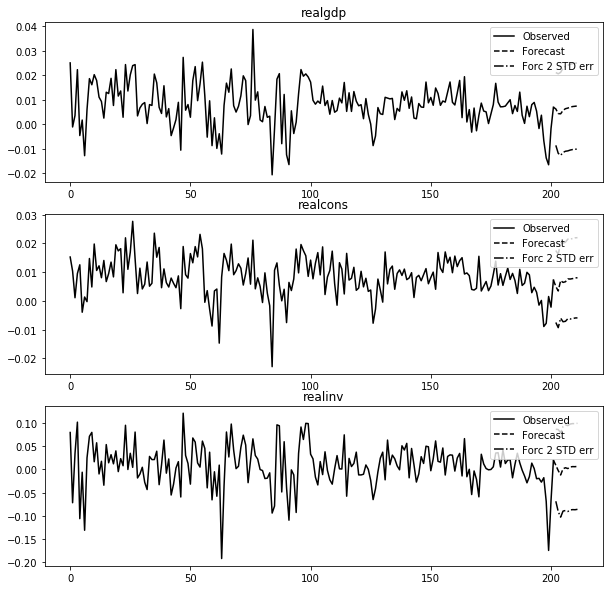

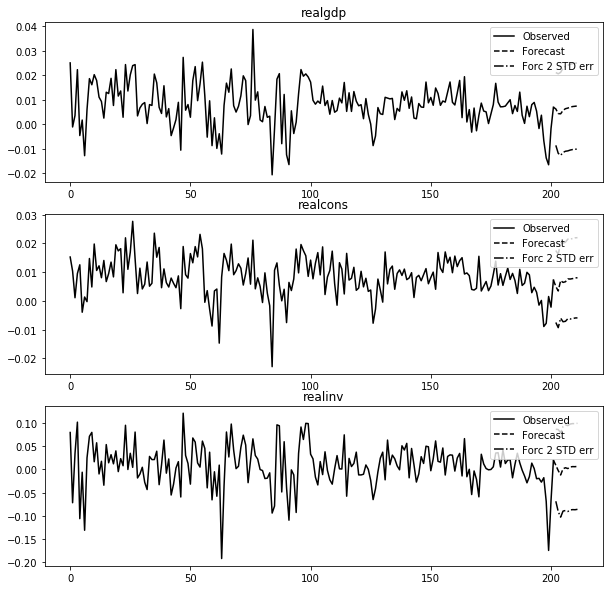

In [22]:
results.plot_forecast(10)